In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
audio_files_path = "/content/drive/MyDrive/Colab Notebooks/audio dataset/KAGGLE/AUDIO"


In [5]:
folders = os.listdir(audio_files_path)
print(folders)

['FAKE', 'REAL']


In [6]:
real_audio = "/content/drive/MyDrive/Colab Notebooks/audio dataset/KAGGLE/AUDIO/REAL/trump-original.wav"
fake_audio = "/content/drive/MyDrive/Colab Notebooks/audio dataset/KAGGLE/AUDIO/FAKE/linus-to-biden.wav"

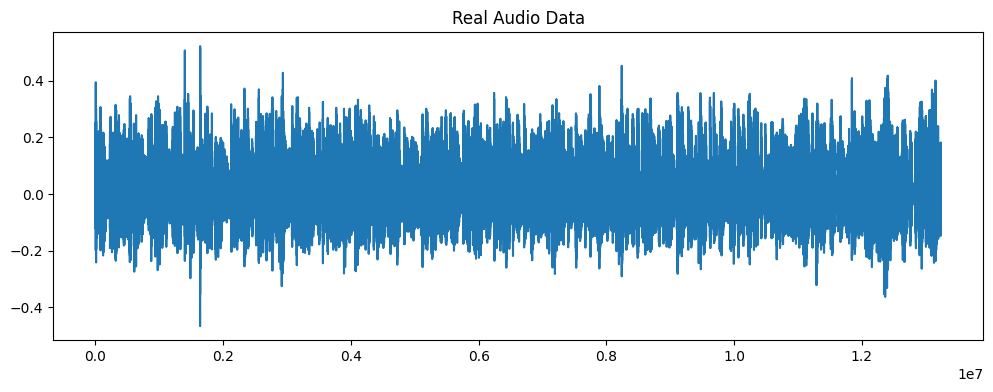

In [7]:
real_ad, real_sr = librosa.load(real_audio)
plt.figure(figsize=(12, 4))
plt.plot(real_ad)
plt.title("Real Audio Data")
plt.show()

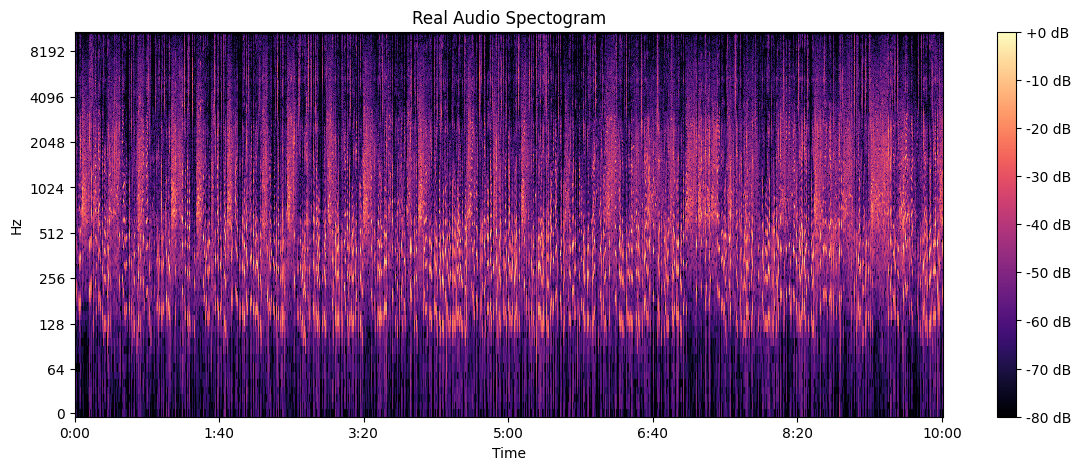

In [8]:
real_spec = np.abs(librosa.stft(real_ad))
real_spec = librosa.amplitude_to_db(real_spec, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_spec, sr=real_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Real Audio Spectogram")
plt.show()

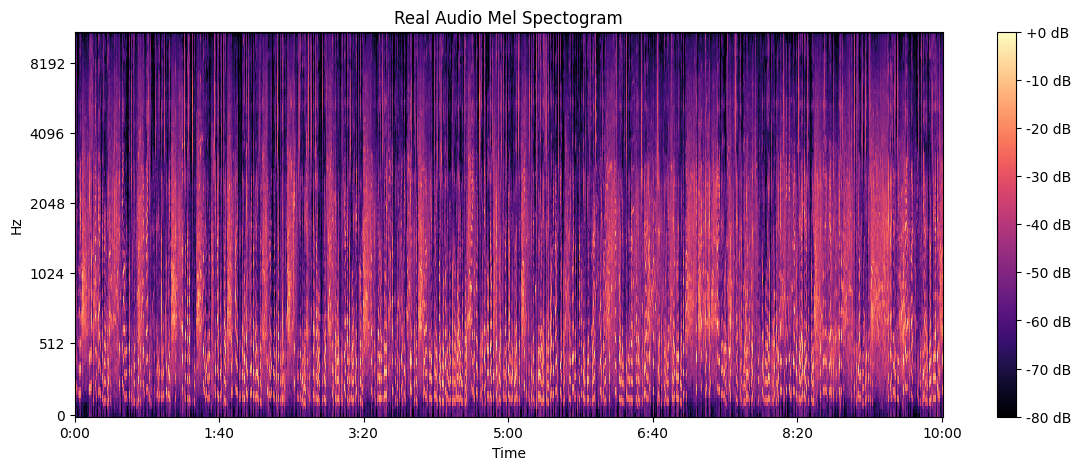

In [9]:
real_mel_spect = librosa.feature.melspectrogram(y=real_ad, sr=real_sr)
real_mel_spect = librosa.power_to_db(real_mel_spect, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mel_spect, y_axis="mel", x_axis="time")
plt.title("Real Audio Mel Spectogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

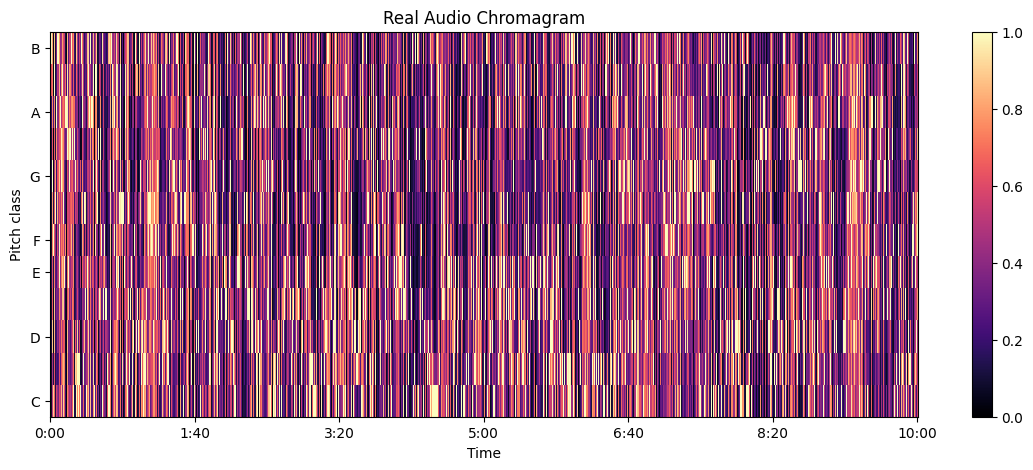

In [10]:
real_chroma = librosa.feature.chroma_cqt(y=real_ad, sr=real_sr, bins_per_octave=36)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_chroma, sr=real_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Real Audio Chromagram")
plt.show()

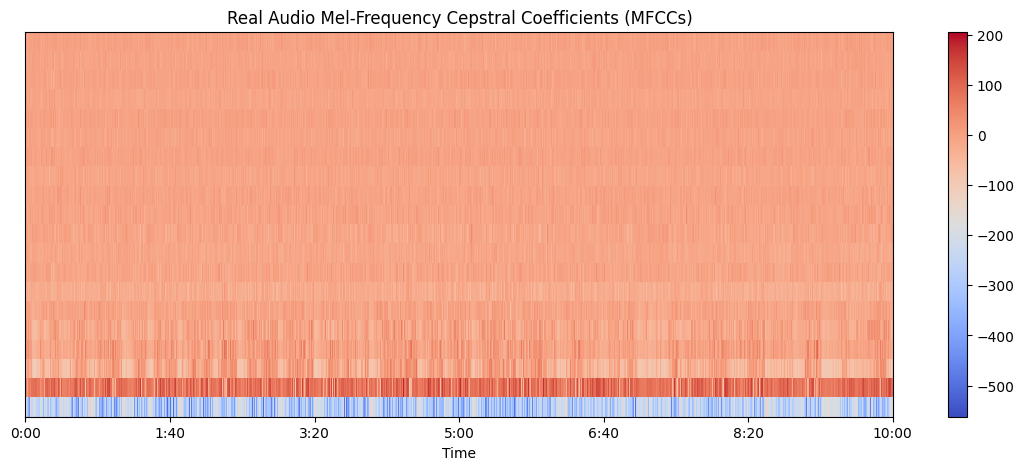

In [11]:
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

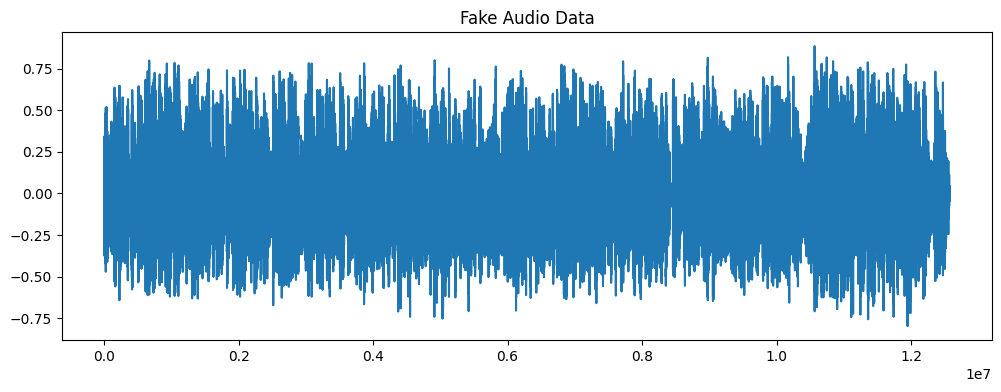

In [12]:
fake_ad, fake_sr = librosa.load(fake_audio)
plt.figure(figsize=(12, 4))
plt.plot(fake_ad)
plt.title("Fake Audio Data")
plt.show()

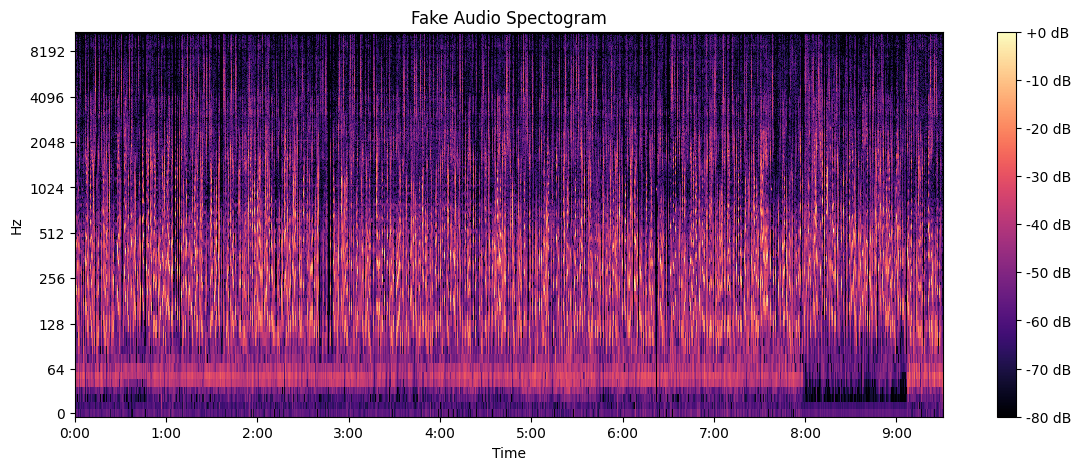

In [13]:
fake_spec = np.abs(librosa.stft(fake_ad))
fake_spec = librosa.amplitude_to_db(fake_spec, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_spec, sr=fake_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Fake Audio Spectogram")
plt.show()

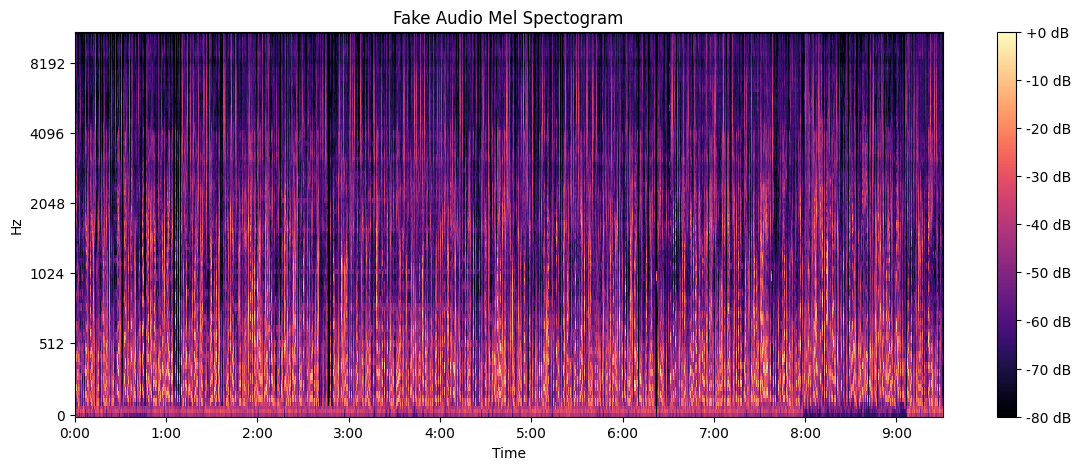

In [14]:
fake_mel_spect = librosa.feature.melspectrogram(y=fake_ad, sr=fake_sr)
fake_mel_spect = librosa.power_to_db(fake_mel_spect, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_mel_spect, y_axis="mel", x_axis="time")
plt.title("Fake Audio Mel Spectogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

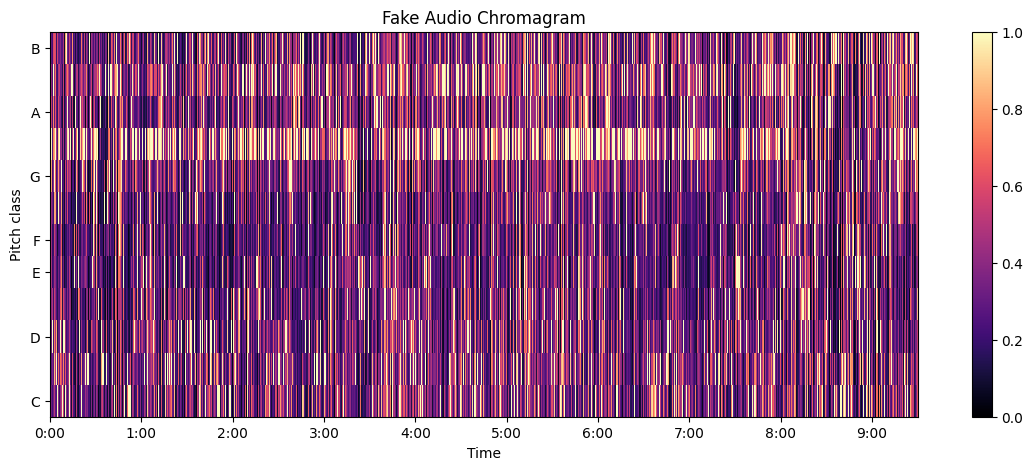

In [15]:
fake_chroma = librosa.feature.chroma_cqt(y=fake_ad, sr=fake_sr, bins_per_octave=36)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_chroma, sr=fake_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Fake Audio Chromagram")
plt.show()

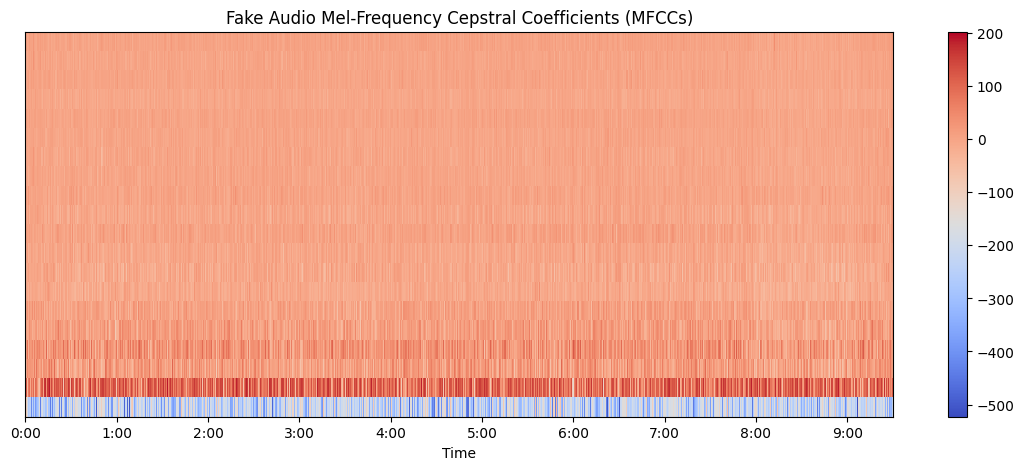

In [16]:
fake_mfccs = librosa.feature.mfcc(y=fake_ad, sr=fake_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_mfccs, sr=fake_sr, x_axis="time")
plt.colorbar()
plt.title("Fake Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

In [17]:
data = []
labels = []

for folder in os.listdir(audio_files_path):
    files = os.listdir(os.path.join(audio_files_path, folder))
    for file in tqdm(files):
        #files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]
        file_path = os.path.join(audio_files_path, folder, file)
        audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
        data.append(mfccs_features_scaled)
        labels.append(folder)

100%|██████████| 8/8 [01:00<00:00,  7.54s/it]


In [18]:
pip install audioread


In [19]:
pip install pydub


In [20]:
pip install ffmpeg


  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=82edbb862cc77bb6e9ade7a77bd7b3c3338240acb7cc0a21f90e01f9006d86f5
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [21]:
feature_df = pd.DataFrame({"features": data, "class": labels})
feature_df.head()

,features,class
0,"[-344.30576, 75.554665, -13.031928, 1.4159139,...",FAKE
1,"[-349.3125, 74.14648, -17.648636, 1.6684389, -...",FAKE
2,"[-272.68378, 101.50515, -22.251564, 4.101077, ...",FAKE
3,"[-280.70587, 90.476036, -29.340603, -1.4076431...",FAKE
4,"[-260.1085, 100.856926, -25.453161, -0.2690358...",FAKE


In [22]:
feature_df["class"].value_counts()

class
FAKE    56
REAL     8
Name: count, dtype: int64

In [23]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [24]:
feature_df["class"] = label_encoder(feature_df["class"])

class ['FAKE' 'REAL']


In [25]:
X = np.array(feature_df["features"].tolist())
y = np.array(feature_df["class"].tolist())

In [26]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [27]:
y_resampled = to_categorical(y_resampled)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [29]:
num_labels = len(feature_df["class"].unique())
num_labels

2

In [30]:
input_shape = feature_df["features"][0].shape
input_shape

(40,)

In [31]:
model = Sequential()
model.add(Dense(128, input_shape=input_shape))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation(activation="softmax"))

In [32]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5248      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [34]:
early = EarlyStopping(monitor="val_loss", patience=5)


In [35]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=2, epochs=100, callbacks=[early])


Epoch 1/100
45/45 [==============================] - 5s 13ms/step - loss: 28.4649 - accuracy: 0.3708 - val_loss: 1.0544 - val_accuracy: 0.6957
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 13.3366 - accuracy: 0.5393 - val_loss: 3.3910 - val_accuracy: 0.3478
Epoch 3/100
45/45 [==============================] - 0s 7ms/step - loss: 12.6915 - accuracy: 0.4382 - val_loss: 0.6089 - val_accuracy: 0.6957
Epoch 4/100
45/45 [==============================] - 0s 5ms/step - loss: 8.7644 - accuracy: 0.5056 - val_loss: 0.6472 - val_accuracy: 0.6522
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 7.7921 - accuracy: 0.5955 - val_loss: 1.5517 - val_accuracy: 0.3478
Epoch 6/100
45/45 [==============================] - 0s 5ms/step - loss: 6.4745 - accuracy: 0.4944 - val_loss: 0.8105 - val_accuracy: 0.4348
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 5.5053 - accuracy: 0.4382 - val_loss: 0.7163 - val_accuracy: 0.3913
Epoch 8/1

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 0s 22ms/step - loss: 0.6234 - accuracy: 0.7391
Test Loss: 0.6234316825866699
Test Accuracy: 0.739130437374115


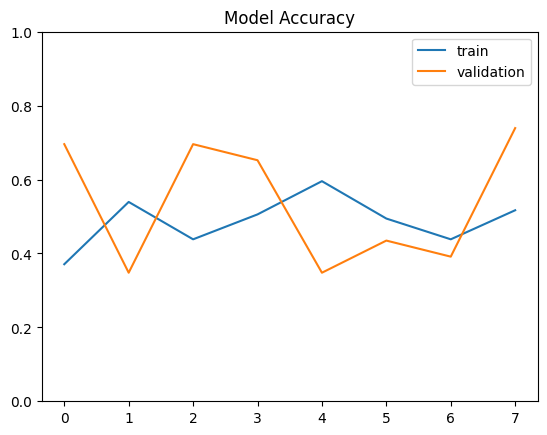

In [37]:
plt.figure()
plt.title("Model Accuracy")
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()
plt.ylim([0, 1])
plt.show()

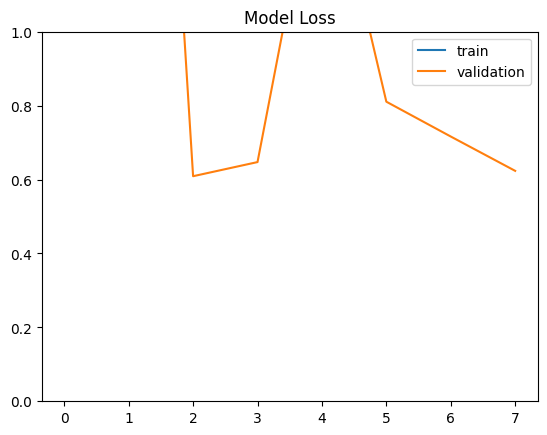

In [38]:
plt.figure()
plt.title("Model Loss")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.ylim([0, 1])
plt.show()

In [39]:
def detect_fake(filename):
    sound_signal, sample_rate = librosa.load(filename, res_type="kaiser_fast")
    mfcc_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfcc_features.T, axis=0)
    mfccs_features_scaled = mfccs_features_scaled.reshape(1, -1)
    result_array = model.predict(mfccs_features_scaled)
    print(result_array)
    result_classes = ["FAKE", "REAL"]
    result = np.argmax(result_array[0])
    print("Result:", result_classes[result])

In [40]:
test_real = "/content/drive/MyDrive/Colab Notebooks/audio dataset/KAGGLE/AUDIO/REAL/linus-original.wav"
test_fake = "/content/drive/MyDrive/Colab Notebooks/audio dataset/KAGGLE/AUDIO/FAKE/biden-to-Trump.wav"

In [41]:
detect_fake(test_real)

1/1 [==============================] - 0s 123ms/step
[[0.6563626  0.34363744]]
Result: FAKE


In [42]:
detect_fake(test_fake)

1/1 [==============================] - 0s 167ms/step
[[0.43372804 0.56627196]]
Result: REAL


In [45]:
from tensorflow.keras.models import load_model, save_model

# Save model
model.save('deepfake_audio_model.h5')

# Load model
loaded_model = load_model('deepfake_audio_model.h5')


In [49]:
from google.colab import files

In [50]:
model_filename = 'deepfake_audio_model.h5'
model.save(model_filename)
save_model(model, model_filename)
audio_model=files.download(model_filename)
print(f"Model saved as {audio_model}")

<ipython-input-50-236e35e187a7>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved as None


In [51]:
import pickle
pickle.dump(model, open("/content/model.pkl", "wb"))